# Gaussian Naive Bayes classifier

## To-Do

- [ ] Add mathematical explanations
- [ ] Compute prior probability

## Resources

- https://en.wikipedia.org/wiki/Naive_Bayes_classifier
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

In [ ]:
class GaussianNaiveBayesClassifier:
    def __init__(self, nb_classes, nb_dim, cov_type='identity'):
        self.nb_classes = nb_classes
        self.nb_dim = nb_dim
        self.cov_type = cov_type

    def train(self, X, y):
        self.mu = np.zeros((self.nb_classes, self.nb_dim))
        self.sigma = np.zeros((self.nb_classes, self.nb_dim, self.nb_dim))

        # Create cov matrix which is shared across all classes
        if self.cov_type == 'rand':
            tmp = np.random.rand(self.nb_dim, self.nb_dim)
            cov = tmp.T @ tmp
            self.sigma = cov

        # Estimate mean for each class
        for c in range(self.nb_classes):
            X_class = X[y == c]
            self.mu[c] = np.mean(X_class, axis=0)

            if self.cov_type == 'identity':
                self.sigma[c] = np.identity(self.nb_dim)
            elif self.cov_type == 'unique':
                self.sigma[c] = np.cov(X_class, rowvar=False) # singular matrix

    def predict(self, X, verbose=False):
        res = np.zeros(len(X), dtype=np.uint8)

        for i in range(len(X)):
            probs = np.empty(self.nb_classes)
            for c in range(self.nb_classes):
                # Multiplying by prior probability is useless as all
                # classes are equally probable in our case (MNIST).
                probs[c] = multivariate_normal.logpdf(X[i],
                                                      self.mu[c],
                                                      self.sigma[c])
            res[i] = np.argmax(probs)

            if verbose:
                print('Predictions {}/{}'.format(i, len(X)))

        return res

## Import MNIST dataset

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Flatten
X_train = X_train.reshape((len(X_train), -1))
X_test = X_test.reshape((len(X_test), -1))

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


## Train models

In [ ]:
# Cov matrix will be the identity matrix for all classes
classifier_identity = GaussianNaiveBayesClassifier(10, 784)
classifier_identity.train(X_train, y_train)

# Cov matrix will be a random matrix for all classes
classifier_rand = GaussianNaiveBayesClassifier(10, 784, 'rand')
classifier_rand.train(X_train, y_train)

print("Training of both models completed!")

Training of both models completed!


## Evaluate models

In [ ]:
# Evaluate on a sub set of X_test
nb_test_samples = 100
X_test_sub = X_test[:nb_test_samples]
y_test_sub = y_test[:nb_test_samples]

res_identity = classifier_identity.predict(X_test_sub, verbose=False)
print(res_identity)

res_rand = classifier_rand.predict(X_test_sub, verbose=False)
print(res_rand)

In [ ]:
# Compute accuracies
accuracy_identity = np.sum(res_identity == y_test_sub) / nb_test_samples
print("Accuracy (identity): {}".format(accuracy_identity))

accuracy_random = np.sum(res_rand == y_test_sub) / nb_test_samples
print("Accuracy (rand): {}".format(accuracy_random))

Accuracy (identity): 0.8
Accuracy (rand): 0.81


Image 17 : expected 7, predicted 7


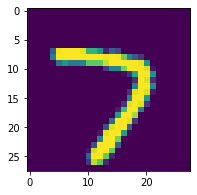

In [ ]:
# Test on a random image with 'identity' model
test_image_index = 17
test_image_image = X_test_sub[test_image_index]
test_image_expected = y_test_sub[test_image_index]
test_image_prediction = res_identity[test_image_index]

print("Image {} : expected {}, predicted {}".format(test_image_index,
                                                    test_image_expected,
                                                    test_image_prediction))

plt.figure(figsize = (3, 3))
plt.imshow(test_image_image.reshape((28, 28)), interpolation='nearest')